In [15]:
import csv, copy
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def read_from_csv(filename):
    data = []
    with open(filename, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        for row in reader:
            data.append(row)
    return headers, data


def insertion_sort(array, index_of_col):
    n = len(array)
    for i in range(1, n):
        x = array[i]
        j = i
        while j > 0 and float(array[j - 1][index_of_col]) < float(x[index_of_col]):
            array[j] = array[j - 1]
            j -= 1
        array[j] = x
    return array


def select_sort(A, index_of_col):
    for i in range(len(A) - 1):
        min_index = i
        for k in range(i + 1, len(A)):
            if A[k][index_of_col] < A[min_index][index_of_col]:
                min_index = k
        A[i], A[min_index] = A[min_index], A[i]
    return A


def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if arr[mid][2] == target:
            return mid
        elif arr[mid][2] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


def output_sales(sales, header):
    print(header)
    for row in sales:
        print(str(row[0]).center(len(headers[0]) + 3), str(row[1]).center(len(headers[1]) + 3),
              str(row[2]).center(len(headers[2]) + 3),
              str(row[3]).center(len(headers[3]) + 3), str(row[4]).center(len(headers[4]) + 3),
              str(row[5]).center(len(headers[5]) + 3),
              str(row[6]).center(len(headers[6]) + 3))

## Вывод данных из файла sales_data.csv

In [17]:
filename = "sales_data.csv"
headers, sales_data = read_from_csv(filename)
output_sales(sales_data, headers)

['Order Number', 'Order Date', 'Product Name', 'Product Category', 'Quantity Sold', 'Unit Price', 'Total Cost']
      1150        2024-03-10     T-shirt_1          Clothing             40           4623.17       184926.8  
      6057        2023-05-30      Laptop_1        Electronics            24           1270.35       30488.4   
      6422        2023-08-18        TV_1          Electronics            6             1736.6       10419.6   
      9638        2024-03-14     Sneakers_1         Footwear             20           8665.35       173307.0  
      8524        2023-08-27      Laptop_2        Electronics            29           1521.67       44128.43  
      1879        2023-09-21    Work-shoes_1        Footwear             26           4494.56      116858.56  
      3121        2023-09-19      Boots_1           Footwear             32           8808.63      281876.16  
      6603        2023-08-15      Jacket_1          Clothing             9            6715.63       60440.67  


## Общая выручка магазина

In [18]:
total_revenue = sum([float(row[6]) for row in sales_data])
print("Общая выручка магазина: ", str(round(total_revenue, 2)) + "р")

Общая выручка магазина:  6218200.3р


## Сортировка массива по total_cost и последующий вывод наибольшей выручки

In [19]:
# Применяется сортировка вставками
copy_massiv = copy.deepcopy(sales_data)
sorted_sales_total_cost = insertion_sort(copy_massiv, 6)
output_sales(sorted_sales_total_cost, headers)

['Order Number', 'Order Date', 'Product Name', 'Product Category', 'Quantity Sold', 'Unit Price', 'Total Cost']
      9329        2024-02-27        TV_7          Electronics            39           9862.81      384649.59  
      7785        2024-02-24      Jeans_1           Clothing             36           9625.83      346529.88  
      5350        2024-02-28        TV_2          Electronics            33           8925.11      294528.63  
      9814        2023-06-01    Work-shoes_6        Footwear             31           9298.58      288255.98  
      3121        2023-09-19      Boots_1           Footwear             32           8808.63      281876.16  
      9814        2024-02-02    Work-shoes_8        Footwear             30           7444.65       223339.5  
      5823        2024-02-12      Boots_3           Footwear             30           7265.38       217961.4  
      7849        2024-05-08    Work-shoes_7        Footwear             26           8315.51      216203.26  


In [32]:
print("Товар, который принес наибольшую выручку: ", sorted_sales_total_cost[0][2],
      "- " + str(sorted_sales_total_cost[0][6]) + "р")

Товар, который принес наибольшую выручку:  TV_7 - 384649.59р


## Сортировка массива по quantity и последующий вывод наибольшие продажи товаров

In [21]:
# Применяется сортировка вставками
copy_massiv = copy.deepcopy(sales_data)
sorted_sales_quantity = insertion_sort(copy_massiv, 4)
output_sales(sorted_sales_quantity, headers)

['Order Number', 'Order Date', 'Product Name', 'Product Category', 'Quantity Sold', 'Unit Price', 'Total Cost']
      1150        2024-03-10     T-shirt_1          Clothing             40           4623.17       184926.8  
      4198        2024-01-20    Smartphone_6      Electronics            40           5222.74       208909.6  
      4832        2023-07-03      Jeans_2           Clothing             40            617.63       24705.2   
      9329        2024-02-27        TV_7          Electronics            39           9862.81      384649.59  
      7559        2023-06-21    Work-shoes_2        Footwear             38           4967.45       188763.1  
      7553        2023-08-20    Smartphone_3      Electronics            38           1652.49       62794.62  
      7785        2024-02-24      Jeans_1           Clothing             36           9625.83      346529.88  
      8748        2024-05-08        TV_3          Electronics            36           2888.48      103985.28  


In [22]:
print("Товар, который был продан наибольшее количество раз: ", sorted_sales_quantity[0][2],
      "- " + str(sorted_sales_quantity[0][4]))

Товар, который был продан наибольшее количество раз:  T-shirt_1 - 40


## Поиск товара и последующий вывод информации по нему

In [33]:
# Применяется сортировка выбором и бинарный поиск
copy_massiv = copy.deepcopy(sales_data)
sorted_sales_name = select_sort(copy_massiv, 2)
print("Товар TV_3 найден. Дополнительная информация по нему")
print(headers)
row = sorted_sales_name[binary_search(sorted_sales_name, "TV_3")]
print(str(row[0]).center(len(headers[0]) + 3), str(row[1]).center(len(headers[1]) + 3),
              str(row[2]).center(len(headers[2]) + 3),
              str(row[3]).center(len(headers[3]) + 3), str(row[4]).center(len(headers[4]) + 3),
              str(row[5]).center(len(headers[5]) + 3),
              str(row[6]).center(len(headers[6]) + 3))

Товар TV_3 найден. Дополнительная информация по нему
['Order Number', 'Order Date', 'Product Name', 'Product Category', 'Quantity Sold', 'Unit Price', 'Total Cost']
      8748        2024-05-08        TV_3          Electronics            36           2888.48      103985.28  


## Вывод графиков

In [29]:
sales = pd.read_csv("sales_data.csv", index_col = 0)
sales.describe()

,Quantity Sold,Unit Price,Total Cost
count,50.000000,50.0000,50.000000
mean,24.080000,5272.0122,124364.006000
std,10.939238,2944.9980,93604.644252
min,2.000000,617.6300,4208.370000
25%,18.000000,2393.6675,38690.772500
50%,25.500000,5446.5400,108622.965000
75%,32.000000,7399.8325,182392.345000
max,40.000000,9862.8100,384649.590000


<Axes: title={'center': 'Number of products in categories'}, xlabel='Product Category', ylabel='Number of Sales'>

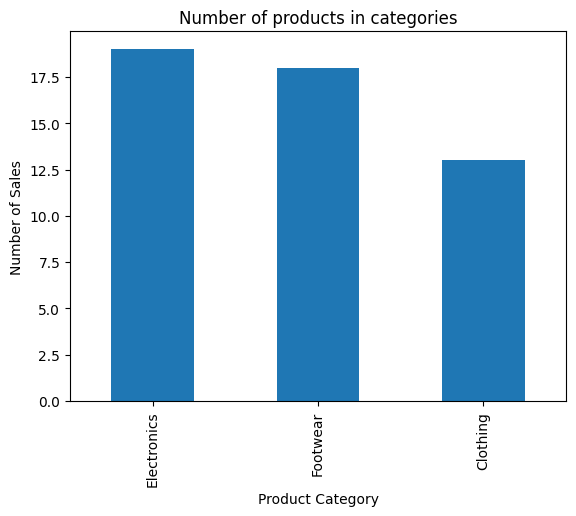

In [25]:
amount_category = sales["Product Category"].value_counts()
amount_category.plot(kind="bar", title="Number of products in categories", xlabel="Product Category", ylabel="Number of Sales")

Text(0.5, 1.0, 'Number of products in categories')

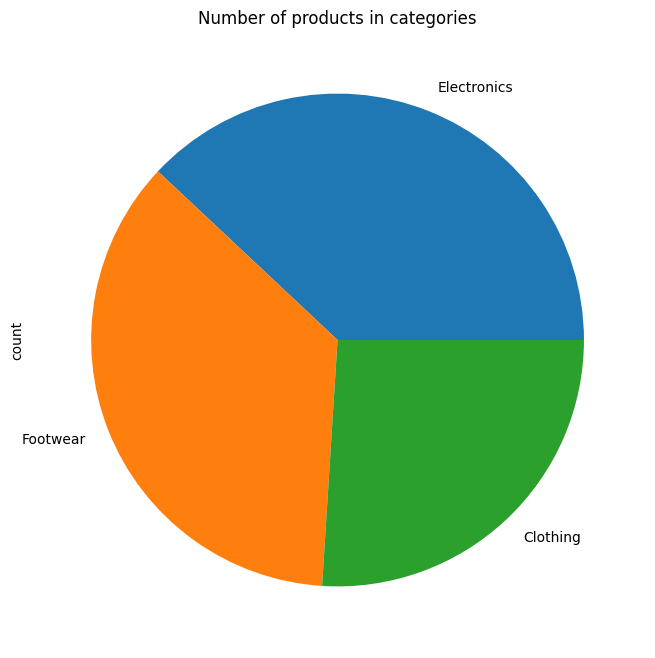

In [31]:
amount_category.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Number of products in categories")

In [26]:
date_and_quantity = sales[["Order Date", "Quantity Sold"]]
date_and_quantity.head()

,Order Date,Quantity Sold
Order Number,,
1150,2024-03-10,40
6057,2023-05-30,24
6422,2023-08-18,6
9638,2024-03-14,20
8524,2023-08-27,29


C:\Users\baran\AppData\Local\Temp\ipykernel_29024\871328897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_and_quantity['Order Date'] = pd.to_datetime(date_and_quantity['Order Date'])


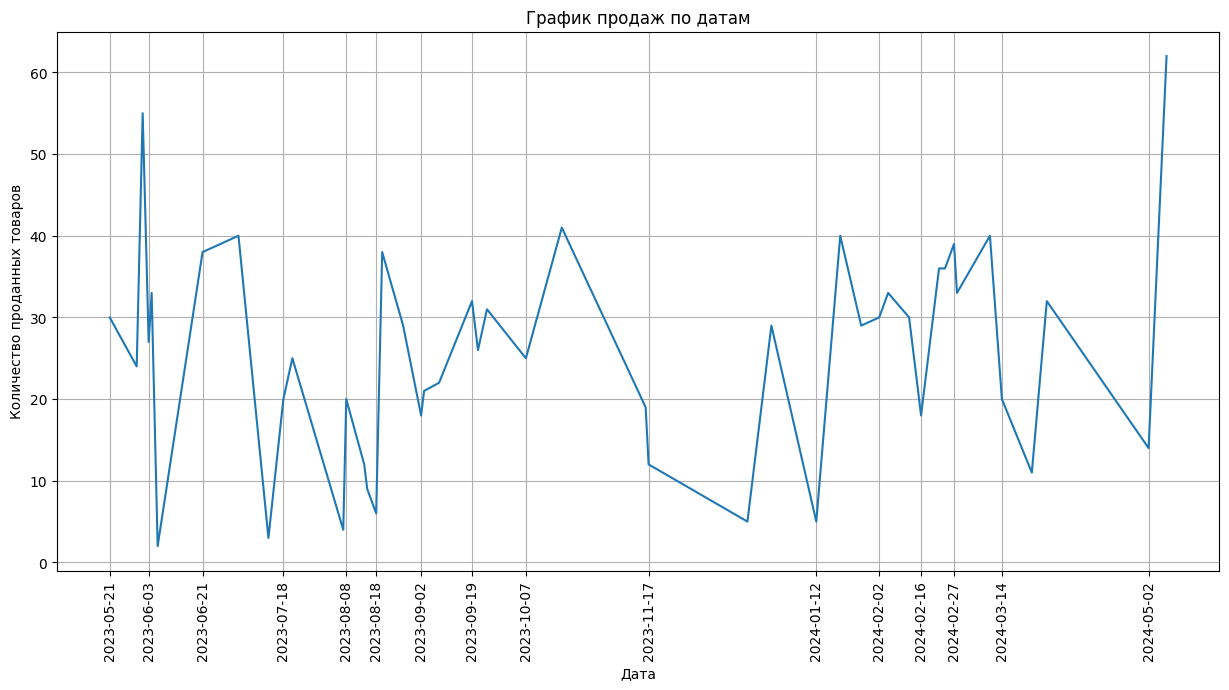

In [27]:
date_and_quantity['Order Date'] = pd.to_datetime(date_and_quantity['Order Date'])

date_and_quantity = date_and_quantity.groupby('Order Date').sum().reset_index()

plt.figure(figsize=(15, 7))
plt.plot(date_and_quantity['Order Date'], date_and_quantity['Quantity Sold'])

plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество проданных товаров')
plt.grid(True)

plt.xticks(rotation=90)
plt.xticks(date_and_quantity['Order Date'][::3], rotation=90)

plt.show()

Text(0, 0.5, 'Количество продаж')

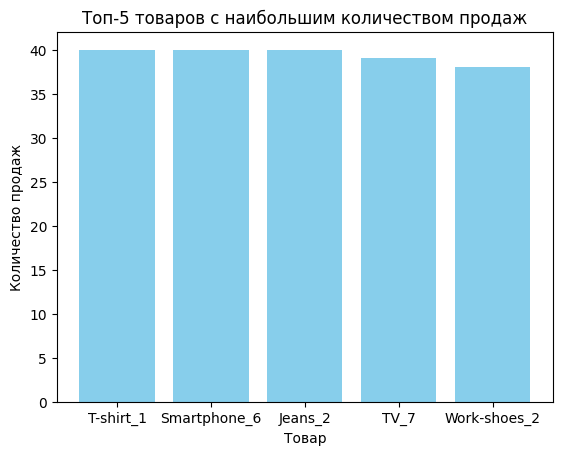

In [28]:
popular_products = sales[['Product Name', 'Quantity Sold']]
popular_products = popular_products.sort_values(by='Quantity Sold', ascending=False).head(5)

plt.bar(popular_products['Product Name'], popular_products['Quantity Sold'], color='skyblue')

plt.title('Топ-5 товаров с наибольшим количеством продаж')
plt.xlabel('Товар')
plt.ylabel('Количество продаж')